In [1]:
import pandas as pd
import numpy as np

In [2]:
excel = pd.read_excel("Reviews-Asmi.xlsx")

In [3]:
table_rating = excel.rename(columns={'reviewerName': 'User','categories': 'Product'})

In [4]:
table_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   rating                1200 non-null   int64 
 1   User                  1200 non-null   object
 2   Product               1200 non-null   object
 3   gPlusPlaceId          1200 non-null   object
 4   unixReviewTime        1200 non-null   object
 5   reviewTime            1200 non-null   object
 6   gPlusUserId           1200 non-null   object
 7   reviews/categories/1  552 non-null    object
 8   reviews/categories/2  294 non-null    object
dtypes: int64(1), object(8)
memory usage: 84.5+ KB


In [5]:
table_rating["Product"].value_counts()

Restaurant                  107
Hotel                        70
None                         59
Asian Restaurant             57
European Restaurant          24
                           ... 
Mortgage Lender               1
Lawn Mower Store              1
Personal Injury Attorney      1
Woodworker                    1
餐飲美食                          1
Name: Product, Length: 407, dtype: int64

In [6]:
table_rating_new = table_rating.groupby(['User', 'Product']).agg({'rating': ['mean']})

In [7]:
matrice_rating = pd.pivot_table(table_rating_new,index=["User"],columns=['Product'], values=['rating']).fillna(0)

In [8]:
matrice_rating.head()

rating                                  \
                         mean                                   
Product          ATM Location Acupuncture Clinic Acura Dealer   
User                                                            
Aaron Watters             0.0                0.0          0.0   
Abdalla Mhyo              0.0                0.0          0.0   
Abdul Hmouda              0.0                0.0          0.0   
Abhijeet Acharya          0.0                0.0          0.0   
Abinand E                 0.0                0.0          0.0   

                                                                          \
                                                                           
Product          Administracif3n Pfablica y... Adult Entertainment Store   
User                                                                       
Aaron Watters                              0.0                       0.0   
Abdalla Mhyo                               0.0                       0.0   
Abdul Hmouda                               0.0                       0.0   
Abhijeet Acharya                           0.0                       0.0   
Abinand E                                  0.0                       0.0   

                                                                     \
                                                                      
Product          Advertising Agency Aircraft Rental Service Airport   
User                                                                  
Aaron Watters                   0.0                     0.0     0.0   
Abdalla Mhyo                    0.0                     0.0     0.0   
Abdul Hmouda                    0.0                     0.0     0.0   
Abhijeet Acharya                0.0                     0.0     0.0   
Abinand E                       0.0                     0.0     0.0   

                                                     ...                    \
                                                     ...                     
Product          American Restaurant Amusement Park  ... 日常外食／小吃 日本料理  焼肉店   
User                                                 ...                     
Aaron Watters                    0.0            0.0  ...     0.0  0.0  0.0   
Abdalla Mhyo                     0.0            0.0  ...     0.0  0.0  0.0   
Abdul Hmouda                     0.0            0.0  ...     0.0  0.0  0.0   
Abhijeet Acharya                 0.0            0.0  ...     0.0  0.0  0.0   
Abinand E                        0.0            0.0  ...     0.0  0.0  0.0   

                                                                
                                                                
Product          特色住宿-民宿  製造業 觀光購物-百貨公司 鍋類-麻辣火鍋   陶芸 餐飲美食 재래시장  
User                                                            
Aaron Watters        0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abdalla Mhyo         0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abdul Hmouda         0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abhijeet Acharya     0.0  0.0       0.0     0.0  0.0  0.0  0.0  
Abinand E            0.0  0.0       0.0     0.0  0.0  0.0  0.0  

[5 rows x 407 columns]

In [9]:
multiplication_vector = matrice_rating.dot(matrice_rating.T)
norm_user = np.sqrt((matrice_rating**2).sum(axis = 1))
matrice_norm = np.outer(norm_user, norm_user)
matrice_similarite_cacul = multiplication_vector/matrice_norm

In [10]:
matrice_similarite_cacul.head()

User,Aaron Watters,Abdalla Mhyo,Abdul Hmouda,Abhijeet Acharya,Abinand E,Adam Perry,Adrian Villarreal,Adriel Chan,Ahmad Syameel Anuar,Alan Tower,...,吳明錦,吳雨澄,如月蒼薇,小劉文彬,李棟梁,翁煒智,陳建良,黃小胖,黃郁惠,구시아
User,,,,,,,,,,,,,,,,,,,,,
Aaron Watters,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Abdalla Mhyo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Abdul Hmouda,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
Abhijeet Acharya,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.650945,0.0,1.0,0.0
Abinand E,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [11]:
pip install networkx

In [11]:
import networkx as nx
G = nx.Graph()

In [12]:
G = nx.from_pandas_adjacency(matrice_similarite_cacul)

In [13]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 476\nNumber of edges: 5503\nAverage degree:  23.1218'

In [14]:
FG = nx.Graph()

In [15]:
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt > 0.85 and n != nbr : FG.add_weighted_edges_from([(n, nbr, wt)]) 

In [17]:
# FG.edges(data=True)
FG.order()

211

In [16]:
nx.info(FG)

'Name: \nType: Graph\nNumber of nodes: 211\nNumber of edges: 1156\nAverage degree:  10.9573'

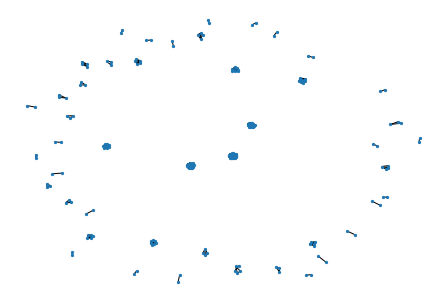

In [18]:
nx.draw(FG,font_weight='bold', node_size=5, weight_size=0.2, width=1)

In [19]:
# https://www.kaggle.com/mayeesha/network-analysis-for-dummies-stackoverflow-data
# https://networkx.org/documentation/stable/tutorial.html#attributes

import matplotlib.pyplot as plt

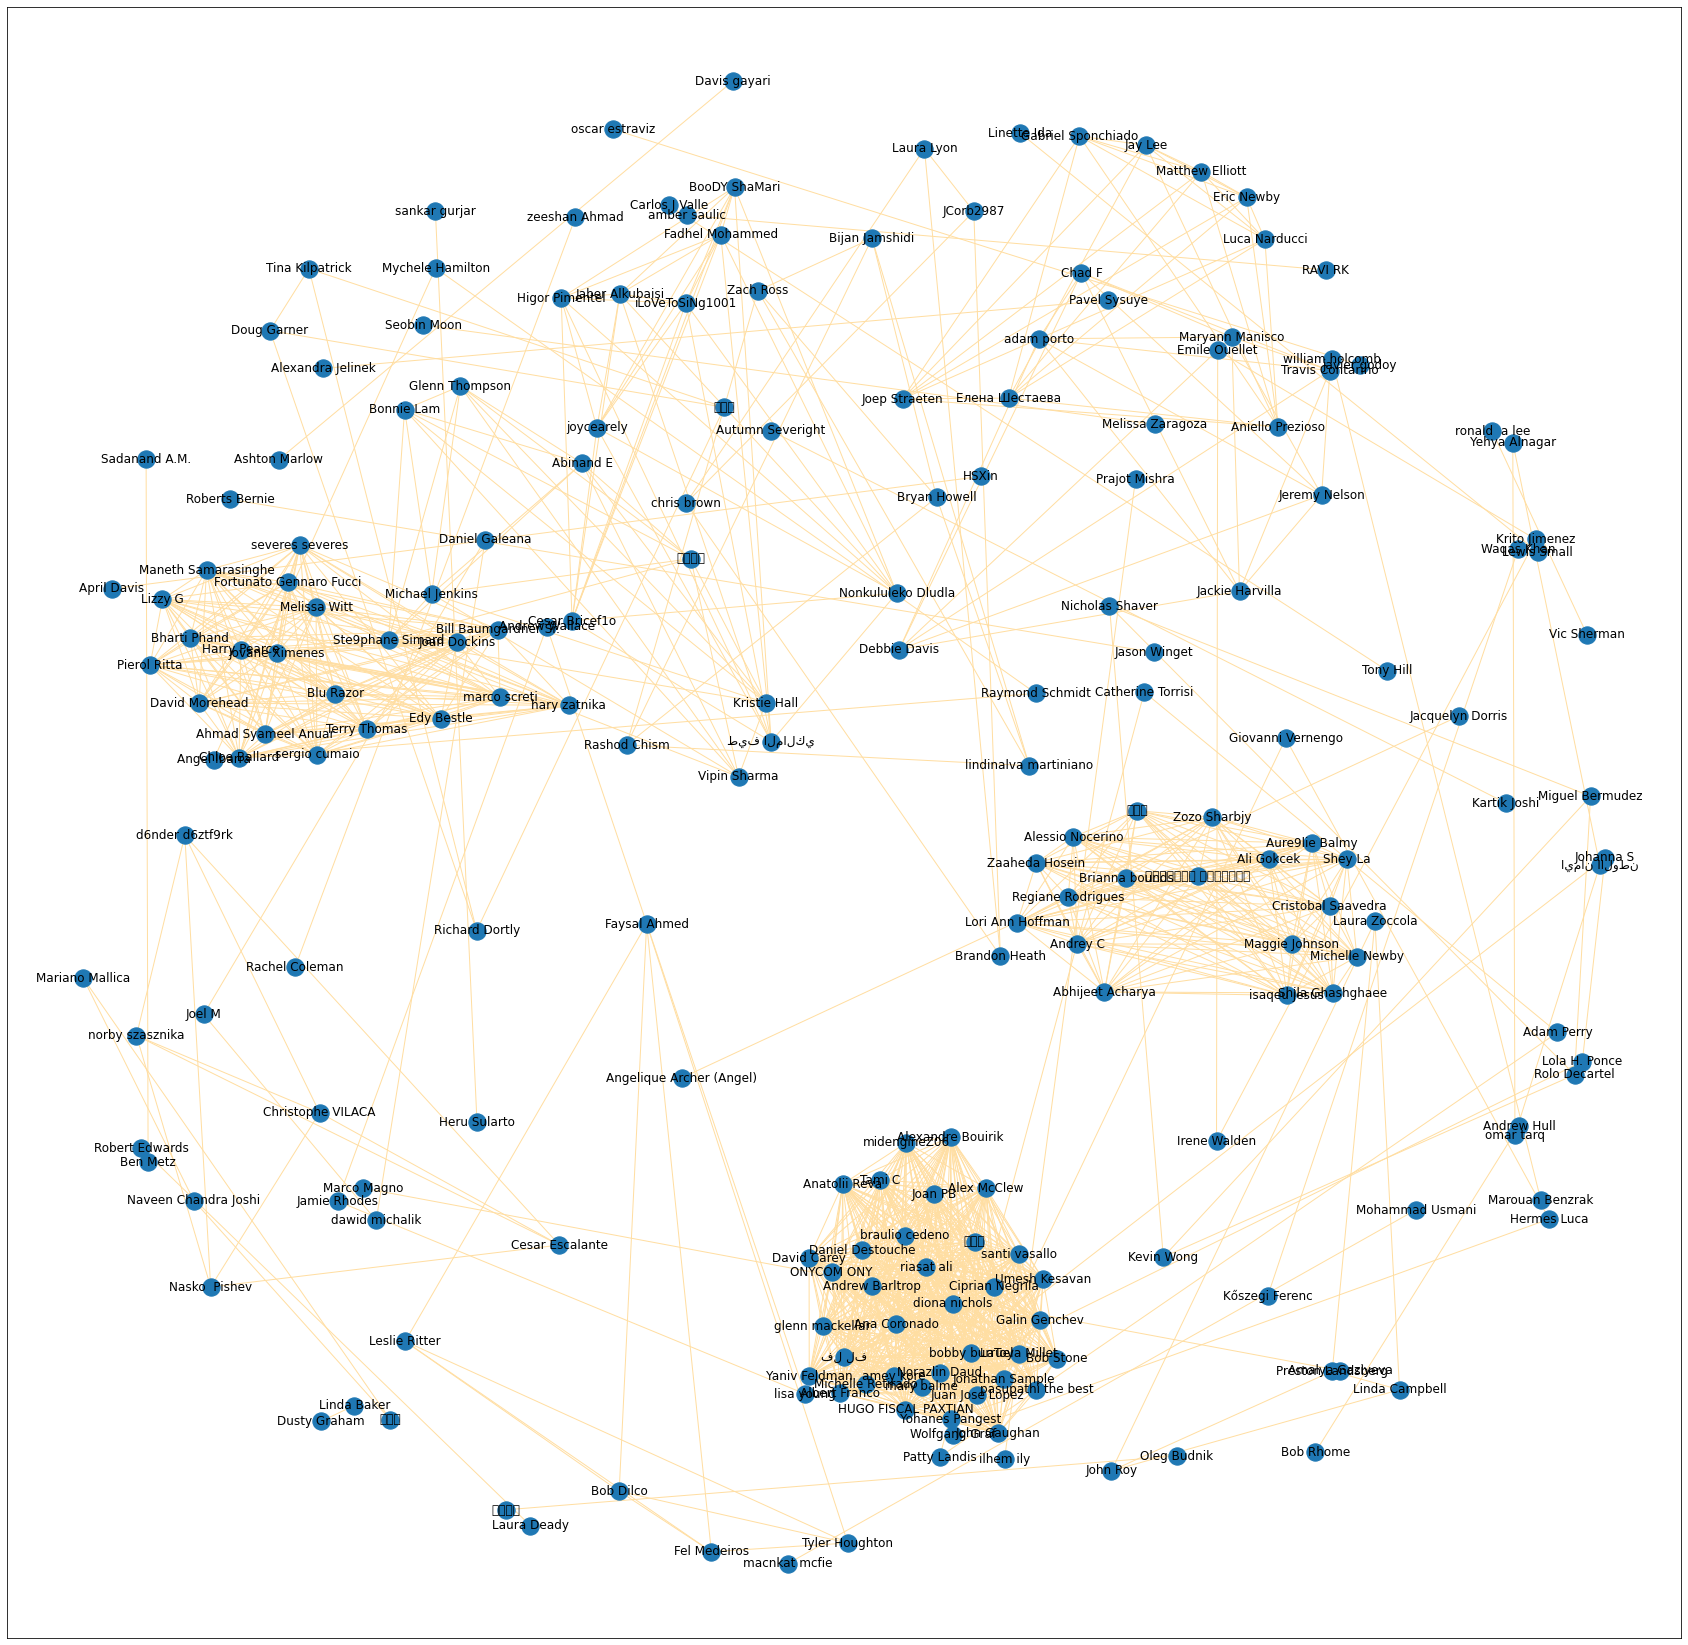

In [21]:
pos = nx.drawing.spring_layout(FG,k=0.70,iterations=60)
plt.figure(figsize=(30,30))
nx.draw_networkx(FG,pos=pos,edge_color='#FFDEA2',edge_width=1)

In [22]:
cliques = list(nx.find_cliques(FG))

In [23]:
clique_number = len(list(cliques))
print(clique_number)

47


In [24]:
sorted_cliques = sorted(list(cliques),key=len)

In [25]:
for clique in sorted_cliques:
    print(clique)

['Sadanand A.M.', 'Ben Metz']
['Jason Winget', 'Roberts Bernie']
['Andrew Hull', 'Bob Rhome']
['Jacquelyn Dorris', 'Angelique Archer (Angel)']
['Kőszegi Ferenc', 'Waqas Khan']
['william holcomb', 'Marouan Benzrak']
['ilhem ily', 'Prajot Mishra']
['Mohammad Usmani', 'macnkat mcfie']
['Dusty Graham', 'Linda Baker']
['Marco Magno', 'Amalya Gaziyeva']
['Tony Hill', 'Carlos J Valle']
['Linette Ida', 'Lewis Small']
['如月蒼薇', 'Oleg Budnik']
['Laura Deady', 'Robert Edwards']
['HSXin', 'April Davis']
['sankar gurjar', 'Heru Sularto']
['Kartik Joshi', 'Autumn Severight']
['Rachel Coleman', 'zeeshan Ahmad']
['amber saulic', 'RAVI RK']
['Alexandra Jelinek', 'Pavel Sysuye']
['Vic Sherman', 'ronald  a lee']
['Seobin Moon', 'Melissa Zaragoza']
['oscar estraviz', 'javier godoy']
['Ashton Marlow', 'Davis gayari']
['Daniel Galeana', 'dawid michalik', 'Joel M']
['Raymond Schmidt', 'Angel Ibarra', 'Mychele Hamilton']
['Naveen Chandra Joshi', 'Mariano Mallica', '黃小胖']
['Johanna S', 'mary balme', 'Lola H. Po

In [26]:
max_clique_nodes = set()

for nodelist in sorted_cliques[-4:-1]:
    for node in nodelist:
        max_clique_nodes.add(node)

In [27]:
max_clique = FG.subgraph(max_clique_nodes)
# max_clique = FG.subgraph(sorted_cliques[-1])
print(nx.info(max_clique))

Name: 
Type: Graph
Number of nodes: 47
Number of edges: 379
Average degree:  16.1277


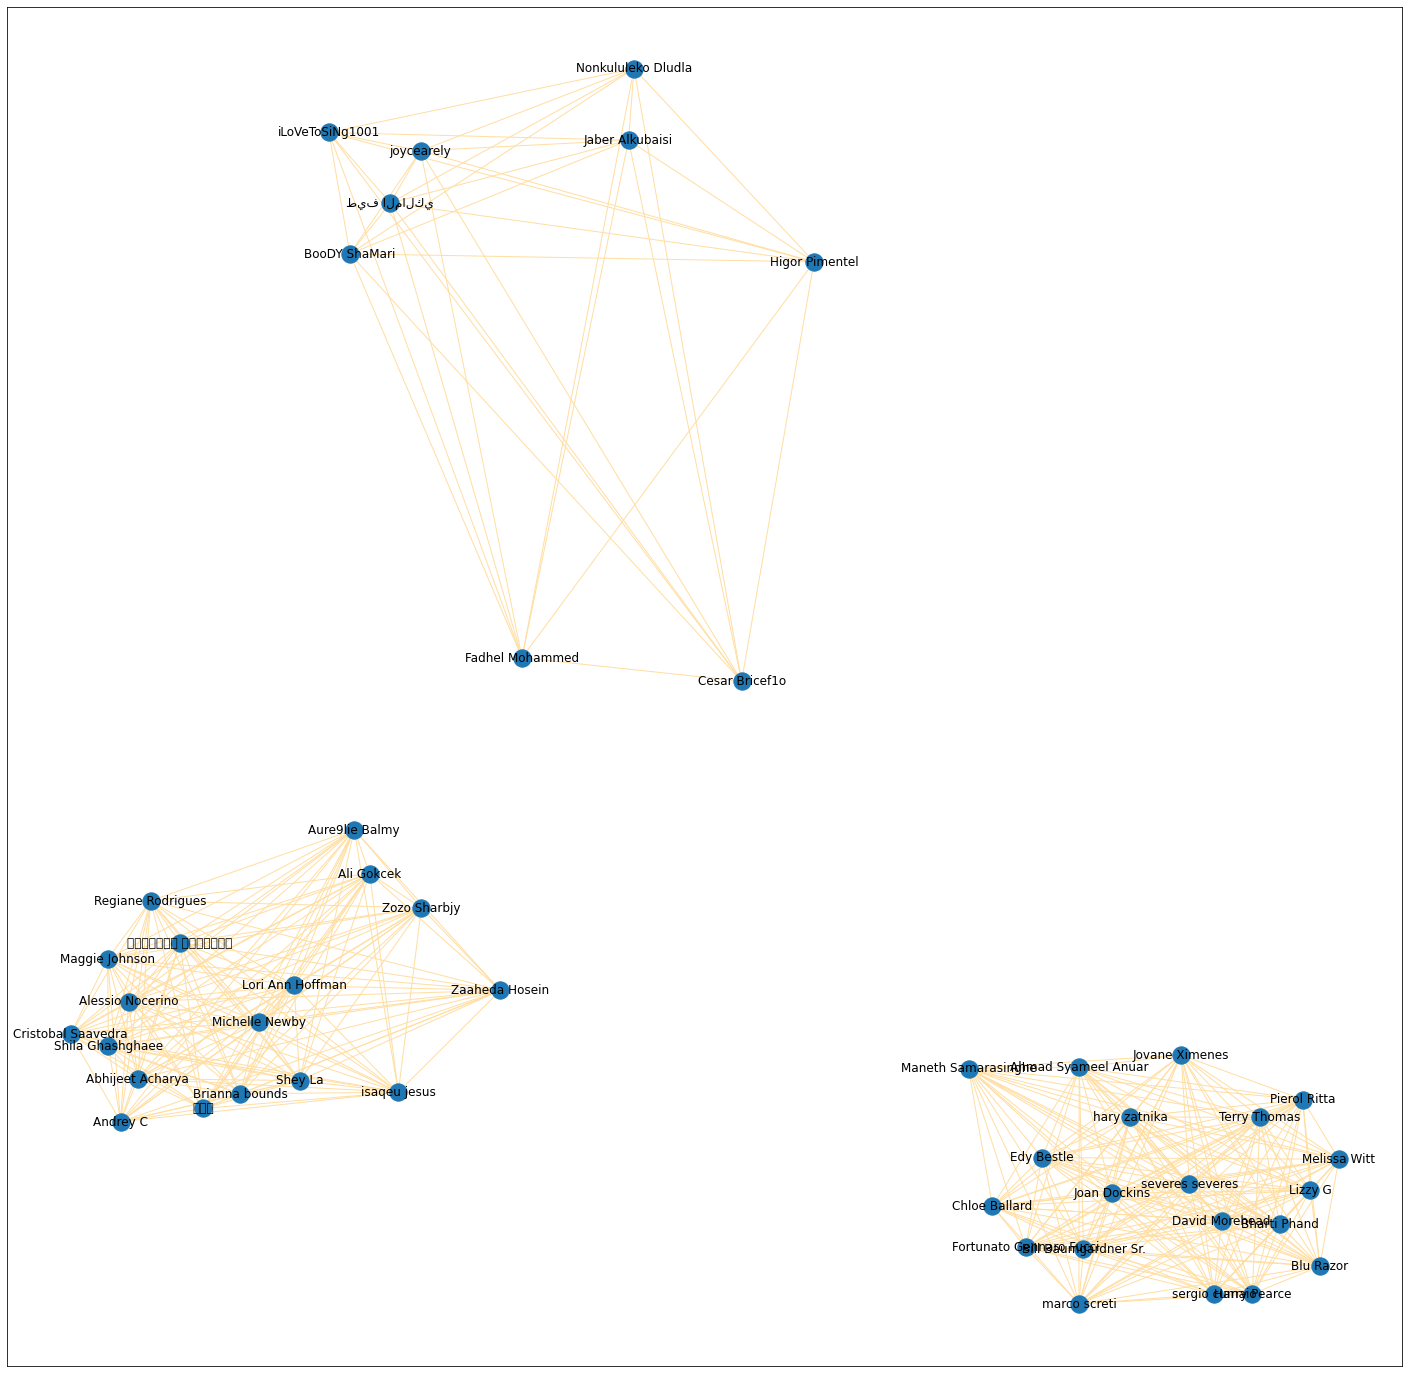

In [28]:
pos = nx.drawing.spring_layout(FG,k=0.70,iterations=60)
plt.figure(figsize=(25,25))
nx.draw_networkx(max_clique,pos=pos,edge_color='#FFDEA2',edge_width=1)

In [29]:
nx.algorithms.clique.cliques_containing_node(FG,"Abhijeet Acharya")

[['Zozo Sharbjy',
  'Abhijeet Acharya',
  'Michelle Newby',
  'Regiane Rodrigues',
  '黃郁惠',
  'ธีรัตม์ คุ้มแถว',
  'isaqeu jesus',
  'Maggie Johnson',
  'Brianna bounds',
  'Cristobal Saavedra',
  'Shila Ghashghaee',
  'Lori Ann Hoffman',
  'Alessio Nocerino',
  'Ali Gokcek',
  'Zaaheda Hosein',
  'Andrey C',
  'Aure9lie Balmy',
  'Shey La']]